In [1]:
from sklearn.feature_extraction import FeatureHasher

h = FeatureHasher(n_features=10)

D = [{'dog': 1, 'cat':2, 'elephant':4},{'dog': 2, 'run': 5}]

f = h.transform(D)
f.toarray()


array([[ 0.,  0., -4., -1.,  0.,  0.,  0.,  0.,  0.,  2.],
       [ 0.,  0.,  0., -2., -5.,  0.,  0.,  0.,  0.,  0.]])

In [2]:
from sklearn.preprocessing import OneHotEncoder

In [3]:
enc = OneHotEncoder(handle_unknown='ignore')
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)

enc.categories_

enc.transform([['Female', 1], ['Male', 4]]).toarray()


enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]])


enc.get_feature_names(['gender', 'group'])

array(['gender_Female', 'gender_Male', 'group_1', 'group_2', 'group_3'],
      dtype=object)

In [4]:
drop_enc = OneHotEncoder(drop='first').fit(X)
drop_enc.categories_

drop_enc.transform([['Female', 1], ['Male', 2]]).toarray()

array([[0., 0., 0.],
       [1., 1., 0.]])

In [6]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = HashingVectorizer(n_features=2**4)
X = vectorizer.fit_transform(corpus)
print(X.shape)
print(X)

(4, 16)
  (0, 0)	-0.5773502691896258
  (0, 8)	-0.5773502691896258
  (0, 13)	0.5773502691896258
  (0, 14)	0.0
  (1, 0)	-0.8164965809277261
  (1, 11)	0.4082482904638631
  (1, 13)	0.4082482904638631
  (1, 14)	0.0
  (2, 4)	-0.7071067811865475
  (2, 5)	0.7071067811865475
  (2, 13)	0.0
  (2, 14)	0.0
  (3, 0)	-0.5773502691896258
  (3, 8)	-0.5773502691896258
  (3, 13)	0.5773502691896258
  (3, 14)	0.0


In [3]:
measurements = [
    {'city': 'Dubai', 'temperature': 33.},
    {'city': 'London', 'temperature': 12.},
    {'city': 'San Francisco', 'temperature': 18.},
]

print(measurements)

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()

print(vec.fit_transform(measurements).toarray())




vec.get_feature_names()

[{'city': 'Dubai', 'temperature': 33.0}, {'city': 'London', 'temperature': 12.0}, {'city': 'San Francisco', 'temperature': 18.0}]
[[ 1.  0.  0. 33.]
 [ 0.  1.  0. 12.]
 [ 0.  0.  1. 18.]]


['city=Dubai', 'city=London', 'city=San Francisco', 'temperature']

In [5]:
movie_entry = [{'category': ['thriller', 'drama'], 'year': 2003},
               {'category': ['animation', 'family'], 'year': 2011},
               {'year': 1974}]

print(vec.fit_transform(movie_entry).toarray())



vec.get_feature_names() == ['category=animation', 'category=drama',
                            'category=family', 'category=thriller',
                            'year']

vec.transform({'category': ['thriller'],
               'unseen_feature': '3'}).toarray()

ValueError: could not convert string to float: 'thriller'

In [6]:
pos_window = [
    {
        'word-2': 'the',
        'pos-2': 'DT',
        'word-1': 'cat',
        'pos-1': 'NN',
        'word+1': 'on',
        'pos+1': 'PP',
    },
    # in a real application one would extract many such dictionaries
]

In [7]:
vec = DictVectorizer()
pos_vectorized = vec.fit_transform(pos_window)
pos_vectorized


pos_vectorized.toarray()

vec.get_feature_names()

['pos+1=PP', 'pos-1=NN', 'pos-2=DT', 'word+1=on', 'word-1=cat', 'word-2=the']

In [12]:
from sklearn.feature_extraction import FeatureHasher

h = FeatureHasher(n_features=10)
D = [{'dog': 1, 'cat':2, 'elephant':4},{'dog': 2, 'run': 5}]
f = h.transform(D)
print(f.toarray())

print("---------------------")

h = FeatureHasher(n_features=10, input_type="string")
D = ["dd", "dd ggg"]
f = h.transform(D)
print(f.toarray())





[[ 0.  0. -4. -1.  0.  0.  0.  0.  0.  2.]
 [ 0.  0.  0. -2. -5.  0.  0.  0.  0.  0.]]
---------------------
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  2.]
 [ 0.  0. -2.  0.  0.  0.  0.  0.  0.  2.]]


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
print(vectorizer)


corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]
X = vectorizer.fit_transform(corpus)
print(X)

CountVectorizer()
  (0, 8)	1
  (0, 3)	1
  (0, 6)	1
  (0, 2)	1
  (0, 1)	1
  (1, 8)	1
  (1, 3)	1
  (1, 6)	1
  (1, 1)	1
  (1, 5)	2
  (2, 6)	1
  (2, 0)	1
  (2, 7)	1
  (2, 4)	1
  (3, 8)	1
  (3, 3)	1
  (3, 6)	1
  (3, 2)	1
  (3, 1)	1


In [16]:
analyze = vectorizer.build_analyzer()
analyze("This is a text document to analyze.") == (
    ['this', 'is', 'text', 'document', 'to', 'analyze'])

True

In [17]:
vectorizer.get_feature_names() == (
    ['and', 'document', 'first', 'is', 'one',
     'second', 'the', 'third', 'this'])


X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [18]:
vectorizer.vocabulary_.get('document')

1

In [19]:
vectorizer.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [20]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2),
                                    token_pattern=r'\b\w+\b', min_df=1)
analyze = bigram_vectorizer.build_analyzer()
analyze('Bi-grams are cool!') == (
    ['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool'])


True

In [21]:
X_2 = bigram_vectorizer.fit_transform(corpus).toarray()
X_2


array([[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]],
      dtype=int64)

In [23]:
feature_index = bigram_vectorizer.vocabulary_.get('is this')
print(feature_index)
X_2[:, feature_index]

7


array([0, 0, 0, 1], dtype=int64)

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
print(transformer)

counts = [[3, 0, 1],
          [2, 0, 0],
          [3, 0, 0],
          [4, 0, 0],
          [3, 2, 0],
          [3, 0, 2]]

tfidf = transformer.fit_transform(counts)
print(tfidf)



tfidf.toarray()


TfidfTransformer(smooth_idf=False)
  (0, 2)	0.5732079309279059
  (0, 0)	0.8194099510753754
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 1)	0.8808994832762984
  (4, 0)	0.47330339145578754
  (5, 2)	0.8135516873095774
  (5, 0)	0.5814926070688599


array([[0.81940995, 0.        , 0.57320793],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.47330339, 0.88089948, 0.        ],
       [0.58149261, 0.        , 0.81355169]])

In [26]:
transformer = TfidfTransformer()
transformer.fit_transform(counts).toarray()

array([[0.85151335, 0.        , 0.52433293],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.55422893, 0.83236428, 0.        ],
       [0.63035731, 0.        , 0.77630514]])

In [27]:
transformer.idf_

array([1.        , 2.25276297, 1.84729786])

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit_transform(corpus)


<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [29]:
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Peter Prettenhofer <peter.prettenhofer@gmail.com>
#         Mathieu Blondel <mathieu@mblondel.org>
# License: BSD 3 clause
from pprint import pprint
from time import time
import logging

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


# #############################################################################
# Load some categories from the training set
categories = [
    'alt.atheism',
    'talk.religion.misc',
]
# Uncomment the following to do the analysis on all the categories
#categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

data = fetch_20newsgroups(subset='train', categories=categories)
print("%d documents" % len(data.filenames))
print("%d categories" % len(data.target_names))
print()

# #############################################################################
# Define a pipeline combining a text feature extractor with a simple
# classifier
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    # 'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    # 'tfidf__use_idf': (True, False),
    # 'tfidf__norm': ('l1', 'l2'),
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    # 'clf__max_iter': (10, 50, 80),
}

if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(data.data, data.target)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Automatically created module for IPython interactive environment
Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc']
857 documents
2 categories

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': (1e-05, 1e-06),
 'clf__max_iter': (20,),
 'clf__penalty': ('l2', 'elasticnet'),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   33.5s finished


done in 34.931s

Best score: 0.953
Best parameters set:
	clf__alpha: 1e-05
	clf__max_iter: 20
	clf__penalty: 'elasticnet'
	vect__max_df: 0.75
	vect__ngram_range: (1, 2)


In [31]:
import chardet    
text1 = b"Sei mir gegr\xc3\xbc\xc3\x9ft mein Sauerkraut"
text2 = b"holdselig sind deine Ger\xfcche"
text3 = b"\xff\xfeA\x00u\x00f\x00 \x00F\x00l\x00\xfc\x00g\x00e\x00l\x00n\x00 \x00d\x00e\x00s\x00 \x00G\x00e\x00s\x00a\x00n\x00g\x00e\x00s\x00,\x00 \x00H\x00e\x00r\x00z\x00l\x00i\x00e\x00b\x00c\x00h\x00e\x00n\x00,\x00 \x00t\x00r\x00a\x00g\x00 \x00i\x00c\x00h\x00 \x00d\x00i\x00c\x00h\x00 \x00f\x00o\x00r\x00t\x00"
decoded = [x.decode(chardet.detect(x)['encoding'])
           for x in (text1, text2, text3)]        
v = CountVectorizer().fit(decoded).vocabulary_    
for term in v: print(term)   

sei
mir
gegrüßt
mein
sauerkraut
holdselig
sind
deine
gerüche
auf
flügeln
des
gesanges
herzliebchen
trag
ich
dich
fort


In [33]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = HashingVectorizer(n_features=2**4)
X = vectorizer.fit_transform(corpus)
print(X.shape)
print(X)

(4, 16)
  (0, 0)	-0.5773502691896258
  (0, 8)	-0.5773502691896258
  (0, 13)	0.5773502691896258
  (0, 14)	0.0
  (1, 0)	-0.8164965809277261
  (1, 11)	0.4082482904638631
  (1, 13)	0.4082482904638631
  (1, 14)	0.0
  (2, 4)	-0.7071067811865475
  (2, 5)	0.7071067811865475
  (2, 13)	0.0
  (2, 14)	0.0
  (3, 0)	-0.5773502691896258
  (3, 8)	-0.5773502691896258
  (3, 13)	0.5773502691896258
  (3, 14)	0.0


In [37]:
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#         Lars Buitinck
# License: BSD 3 clause
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

import logging
from optparse import OptionParser
import sys
from time import time

import numpy as np


# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

# parse commandline arguments
op = OptionParser()
op.add_option("--lsa",
              dest="n_components", type="int",
              help="Preprocess documents with latent semantic analysis.")
op.add_option("--no-minibatch",
              action="store_false", dest="minibatch", default=True,
              help="Use ordinary k-means algorithm (in batch mode).")
op.add_option("--no-idf",
              action="store_false", dest="use_idf", default=True,
              help="Disable Inverse Document Frequency feature weighting.")
op.add_option("--use-hashing",
              action="store_true", default=False,
              help="Use a hashing feature vectorizer")
op.add_option("--n-features", type=int, default=10000,
              help="Maximum number of features (dimensions)"
                   " to extract from text.")
op.add_option("--verbose",
              action="store_true", dest="verbose", default=False,
              help="Print progress reports inside k-means algorithm.")

print(__doc__)
op.print_help()


def is_interactive():
    print("---- is_interactive ------")
    print(sys.modules['__main__'])
    return not hasattr(sys.modules['__main__'], '__file__')


# work-around for Jupyter notebook and IPython console
argv = [] if is_interactive() else sys.argv[1:]
(opts, args) = op.parse_args(argv)
if len(args) > 0:
    op.error("this script takes no arguments.")
    sys.exit(1)


# #############################################################################
# Load some categories from the training set
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]
# Uncomment the following to do the analysis on all the categories
# categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
print()

labels = dataset.target
print(labels)
print(np.unique(labels))
print(np.unique(labels).shape)
true_k = np.unique(labels).shape[0]

print("Extracting features from the training dataset "
      "using a sparse vectorizer")
t0 = time()
if opts.use_hashing:
    if opts.use_idf:
        # Perform an IDF normalization on the output of HashingVectorizer
        hasher = HashingVectorizer(n_features=opts.n_features,
                                   stop_words='english', alternate_sign=False,
                                   norm=None)
        vectorizer = make_pipeline(hasher, TfidfTransformer())
    else:
        vectorizer = HashingVectorizer(n_features=opts.n_features,
                                       stop_words='english',
                                       alternate_sign=False, norm='l2')
else:
    vectorizer = TfidfVectorizer(max_df=0.5, max_features=opts.n_features,
                                 min_df=2, stop_words='english',
                                 use_idf=opts.use_idf)
X = vectorizer.fit_transform(dataset.data)

print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)
print()

if opts.n_components:
    print("Performing dimensionality reduction using LSA")
    t0 = time()
    # Vectorizer results are normalized, which makes KMeans behave as
    # spherical k-means for better results. Since LSA/SVD results are
    # not normalized, we have to redo the normalization.
    svd = TruncatedSVD(opts.n_components)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)

    X = lsa.fit_transform(X)

    print("done in %fs" % (time() - t0))

    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))

    print()


# #############################################################################
# Do the actual clustering

if opts.minibatch:
    km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000, verbose=opts.verbose)
else:
    km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1,
                verbose=opts.verbose)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))
print()

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

print()


if not opts.use_hashing:
    print("Top terms per cluster:")

    if opts.n_components:
        original_space_centroids = svd.inverse_transform(km.cluster_centers_)
        order_centroids = original_space_centroids.argsort()[:, ::-1]
    else:
        order_centroids = km.cluster_centers_.argsort()[:, ::-1]

    terms = vectorizer.get_feature_names()
    for i in range(true_k):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()

Automatically created module for IPython interactive environment
Usage: ipykernel_launcher.py [options]

Options:
  -h, --help            show this help message and exit
  --lsa=N_COMPONENTS    Preprocess documents with latent semantic analysis.
  --no-minibatch        Use ordinary k-means algorithm (in batch mode).
  --no-idf              Disable Inverse Document Frequency feature weighting.
  --use-hashing         Use a hashing feature vectorizer
  --n-features=N_FEATURES
                        Maximum number of features (dimensions) to extract
                        from text.
  --verbose             Print progress reports inside k-means algorithm.
---- is_interactive ------
<module '__main__'>
Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
3387 documents
4 categories

[0 1 1 ... 2 1 1]
[0 1 2 3]
(4,)
Extracting features from the training dataset using a sparse vectorizer
done in 1.219078s
n_samples: 3387, n_featur

In [38]:
"""
======================================================
Classification of text documents using sparse features
======================================================

This is an example showing how scikit-learn can be used to classify documents
by topics using a bag-of-words approach. This example uses a scipy.sparse
matrix to store the features and demonstrates various classifiers that can
efficiently handle sparse matrices.

The dataset used in this example is the 20 newsgroups dataset. It will be
automatically downloaded, then cached.

"""

# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#         Olivier Grisel <olivier.grisel@ensta.org>
#         Mathieu Blondel <mathieu@mblondel.org>
#         Lars Buitinck
# License: BSD 3 clause
import logging
import numpy as np
from optparse import OptionParser
import sys
from time import time
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics


# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

op = OptionParser()
op.add_option("--report",
              action="store_true", dest="print_report",
              help="Print a detailed classification report.")
op.add_option("--chi2_select",
              action="store", type="int", dest="select_chi2",
              help="Select some number of features using a chi-squared test")
op.add_option("--confusion_matrix",
              action="store_true", dest="print_cm",
              help="Print the confusion matrix.")
op.add_option("--top10",
              action="store_true", dest="print_top10",
              help="Print ten most discriminative terms per class"
                   " for every classifier.")
op.add_option("--all_categories",
              action="store_true", dest="all_categories",
              help="Whether to use all categories or not.")
op.add_option("--use_hashing",
              action="store_true",
              help="Use a hashing vectorizer.")
op.add_option("--n_features",
              action="store", type=int, default=2 ** 16,
              help="n_features when using the hashing vectorizer.")
op.add_option("--filtered",
              action="store_true",
              help="Remove newsgroup information that is easily overfit: "
                   "headers, signatures, and quoting.")


def is_interactive():
    return not hasattr(sys.modules['__main__'], '__file__')


# work-around for Jupyter notebook and IPython console
argv = [] if is_interactive() else sys.argv[1:]
(opts, args) = op.parse_args(argv)
if len(args) > 0:
    op.error("this script takes no arguments.")
    sys.exit(1)

print(__doc__)
op.print_help()
print()


# %%
# Load data from the training set
# ------------------------------------
# Let's load data from the newsgroups dataset which comprises around 18000
# newsgroups posts on 20 topics split in two subsets: one for training (or
# development) and the other one for testing (or for performance evaluation).
if opts.all_categories:
    categories = None
else:
    categories = [
        'alt.atheism',
        'talk.religion.misc',
        'comp.graphics',
        'sci.space',
    ]

if opts.filtered:
    remove = ('headers', 'footers', 'quotes')
else:
    remove = ()

print("Loading 20 newsgroups dataset for categories:")
print(categories if categories else "all")

data_train = fetch_20newsgroups(subset='train', categories=categories,
                                shuffle=True, random_state=42,
                                remove=remove)

data_test = fetch_20newsgroups(subset='test', categories=categories,
                               shuffle=True, random_state=42,
                               remove=remove)
print('data loaded')

# order of labels in `target_names` can be different from `categories`
target_names = data_train.target_names


def size_mb(docs):
    return sum(len(s.encode('utf-8')) for s in docs) / 1e6


data_train_size_mb = size_mb(data_train.data)
data_test_size_mb = size_mb(data_test.data)

print("%d documents - %0.3fMB (training set)" % (
    len(data_train.data), data_train_size_mb))
print("%d documents - %0.3fMB (test set)" % (
    len(data_test.data), data_test_size_mb))
print("%d categories" % len(target_names))
print()

# split a training set and a test set
y_train, y_test = data_train.target, data_test.target

print("Extracting features from the training data using a sparse vectorizer")
t0 = time()
if opts.use_hashing:
    vectorizer = HashingVectorizer(stop_words='english', alternate_sign=False,
                                   n_features=opts.n_features)
    X_train = vectorizer.transform(data_train.data)
else:
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
    X_train = vectorizer.fit_transform(data_train.data)
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_train_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_train.shape)
print()

print("Extracting features from the test data using the same vectorizer")
t0 = time()
X_test = vectorizer.transform(data_test.data)
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_test_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_test.shape)
print()

# mapping from integer feature name to original token string
if opts.use_hashing:
    feature_names = None
else:
    feature_names = vectorizer.get_feature_names()

if opts.select_chi2:
    print("Extracting %d best features by a chi-squared test" %
          opts.select_chi2)
    t0 = time()
    ch2 = SelectKBest(chi2, k=opts.select_chi2)
    X_train = ch2.fit_transform(X_train, y_train)
    X_test = ch2.transform(X_test)
    if feature_names:
        # keep selected feature names
        feature_names = [feature_names[i] for i
                         in ch2.get_support(indices=True)]
    print("done in %fs" % (time() - t0))
    print()

if feature_names:
    feature_names = np.asarray(feature_names)


def trim(s):
    """Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."


# %%
# Benchmark classifiers
# ------------------------------------
# We train and test the datasets with 15 different classification models
# and get performance results for each model.
def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

        if opts.print_top10 and feature_names is not None:
            print("top 10 keywords per class:")
            for i, label in enumerate(target_names):
                top10 = np.argsort(clf.coef_[i])[-10:]
                print(trim("%s: %s" % (label, " ".join(feature_names[top10]))))
        print()

    if opts.print_report:
        print("classification report:")
        print(metrics.classification_report(y_test, pred,
                                            target_names=target_names))

    if opts.print_cm:
        print("confusion matrix:")
        print(metrics.confusion_matrix(y_test, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time


results = []
for clf, name in (
        (RidgeClassifier(tol=1e-2, solver="sag"), "Ridge Classifier"),
        (Perceptron(max_iter=50), "Perceptron"),
        (PassiveAggressiveClassifier(max_iter=50),
         "Passive-Aggressive"),
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
        (RandomForestClassifier(), "Random forest")):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False,
                                       tol=1e-3)))

    # Train SGD model
    results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=50,
                                           penalty=penalty)))

# Train SGD with Elastic Net penalty
print('=' * 80)
print("Elastic-Net penalty")
results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=50,
                                       penalty="elasticnet")))

# Train NearestCentroid without threshold
print('=' * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

# Train sparse Naive Bayes classifiers
print('=' * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=.01)))
results.append(benchmark(BernoulliNB(alpha=.01)))
results.append(benchmark(ComplementNB(alpha=.1)))

print('=' * 80)
print("LinearSVC with L1-based feature selection")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(benchmark(Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False,
                                                  tol=1e-3))),
  ('classification', LinearSVC(penalty="l2"))])))


# %%
# Add plots
# ------------------------------------
# The bar plot indicates the accuracy, training time (normalized) and test time
# (normalized) of each classifier.
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()



Classification of text documents using sparse features

This is an example showing how scikit-learn can be used to classify documents
by topics using a bag-of-words approach. This example uses a scipy.sparse
matrix to store the features and demonstrates various classifiers that can
efficiently handle sparse matrices.

The dataset used in this example is the 20 newsgroups dataset. It will be
automatically downloaded, then cached.


Usage: ipykernel_launcher.py [options]

Options:
  -h, --help            show this help message and exit
  --report              Print a detailed classification report.
  --chi2_select=SELECT_CHI2
                        Select some number of features using a chi-squared
                        test
  --confusion_matrix    Print the confusion matrix.
  --top10               Print ten most discriminative terms per class for
                        every classifier.
  --all_categories      Whether to use all categories or not.
  --use_hashing         Use a has

C:\Users\efnxqng\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_ridge.py:556: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '


train time: 0.585s
test time:  0.006s
accuracy:   0.896
dimensionality: 33809
density: 1.000000


Perceptron
________________________________________________________________________________
Training: 
Perceptron(max_iter=50)
train time: 0.041s
test time:  0.006s
accuracy:   0.888
dimensionality: 33809
density: 0.255302


Passive-Aggressive
________________________________________________________________________________
Training: 
PassiveAggressiveClassifier(max_iter=50)
train time: 0.069s
test time:  0.005s
accuracy:   0.902
dimensionality: 33809
density: 0.694852


kNN
________________________________________________________________________________
Training: 
KNeighborsClassifier(n_neighbors=10)
train time: 0.005s
test time:  0.491s
accuracy:   0.858

Random forest
________________________________________________________________________________
Training: 
RandomForestClassifier()
train time: 3.949s
test time:  0.248s
accuracy:   0.831

L2 penalty
______________________________________

<Figure size 1200x800 with 1 Axes>

In [40]:
ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2, 2))

counts = ngram_vectorizer.fit_transform(['words', 'wprds'])
print(counts)

ngram_vectorizer.get_feature_names() == (
    [' w', 'ds', 'or', 'pr', 'rd', 's ', 'wo', 'wp'])

counts.toarray().astype(int)


  (0, 0)	1
  (0, 6)	1
  (0, 2)	1
  (0, 4)	1
  (0, 1)	1
  (0, 5)	1
  (1, 0)	1
  (1, 4)	1
  (1, 1)	1
  (1, 5)	1
  (1, 7)	1
  (1, 3)	1


array([[1, 1, 1, 0, 1, 1, 1, 0],
       [1, 1, 0, 1, 1, 1, 0, 1]])

In [41]:
ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(5, 5))
ngram_vectorizer.fit_transform(['jumpy fox'])


ngram_vectorizer.get_feature_names() == (
    [' fox ', ' jump', 'jumpy', 'umpy '])


ngram_vectorizer = CountVectorizer(analyzer='char', ngram_range=(5, 5))
ngram_vectorizer.fit_transform(['jumpy fox'])


ngram_vectorizer.get_feature_names() == (
    ['jumpy', 'mpy f', 'py fo', 'umpy ', 'y fox'])

True

In [43]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=10)
result = hv.transform(corpus)
print(result)

  (0, 2)	0.0
  (0, 6)	-0.5773502691896258
  (0, 7)	0.5773502691896258
  (0, 8)	-0.5773502691896258
  (1, 2)	-0.5
  (1, 5)	0.5
  (1, 7)	0.5
  (1, 8)	-0.5
  (2, 1)	0.4082482904638631
  (2, 2)	0.4082482904638631
  (2, 4)	-0.4082482904638631
  (2, 5)	-0.4082482904638631
  (2, 7)	0.4082482904638631
  (2, 8)	-0.4082482904638631
  (3, 2)	0.0
  (3, 6)	-0.5773502691896258
  (3, 7)	0.5773502691896258
  (3, 8)	-0.5773502691896258


In [44]:
hv = HashingVectorizer()
hv.transform(corpus)



<4x1048576 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [45]:
def my_tokenizer(s):
    return s.split()

vectorizer = CountVectorizer(tokenizer=my_tokenizer)
vectorizer.build_analyzer()(u"Some... punctuation!") == (
    ['some...', 'punctuation!'])


True

In [46]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

vect = CountVectorizer(tokenizer=LemmaTokenizer())  

In [47]:
import re
def to_british(tokens):
    for t in tokens:
        t = re.sub(r"(...)our$", r"\1or", t)
        t = re.sub(r"([bt])re$", r"\1er", t)
        t = re.sub(r"([iy])s(e$|ing|ation)", r"\1z\2", t)
        t = re.sub(r"ogue$", "og", t)
        yield t

class CustomVectorizer(CountVectorizer):
    def build_tokenizer(self):
        tokenize = super().build_tokenizer()
        return lambda doc: list(to_british(tokenize(doc)))

print(CustomVectorizer().build_analyzer()(u"color colour"))

['color', 'color']


In [48]:
import numpy as np
from sklearn.feature_extraction import image

one_image = np.arange(4 * 4 * 3).reshape((4, 4, 3))
one_image[:, :, 0]  # R channel of a fake RGB picture





patches = image.extract_patches_2d(one_image, (2, 2), max_patches=2,
    random_state=0)
patches.shape

patches[:, :, :, 0]





patches = image.extract_patches_2d(one_image, (2, 2))
patches.shape

patches[4, :, :, 0]

array([[15, 18],
       [27, 30]])

In [2]:
import numpy as np

X = np.array([[1, 1], [2, 1], [3, 1.2], [4, 1], [5, 0.8], [6, 1]])
print(X)

from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=0)

W = model.fit_transform(X)
print(W)

H = model.components_
print(H)

[[1.  1. ]
 [2.  1. ]
 [3.  1.2]
 [4.  1. ]
 [5.  0.8]
 [6.  1. ]]
[[0.         0.46880684]
 [0.55699523 0.3894146 ]
 [1.00331638 0.41925352]
 [1.6733999  0.22926926]
 [2.34349311 0.03927954]
 [2.78981512 0.06911798]]
[[2.09783018 0.30560234]
 [2.13443044 2.13171694]]


In [4]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import make_multilabel_classification
# This produces a feature matrix of token counts, similar to what
# CountVectorizer would produce on text.
X, _ = make_multilabel_classification(random_state=0)
print(X[-2:])

lda = LatentDirichletAllocation(n_components=5,
    random_state=0)

lda.fit(X)

# get topics for some given samples:
lda.transform(X[-2:])

[[6. 4. 1. 4. 4. 3. 2. 1. 1. 2. 2. 3. 3. 4. 5. 0. 2. 1. 3. 5.]
 [2. 4. 2. 3. 4. 1. 5. 2. 3. 6. 4. 0. 2. 2. 0. 3. 2. 5. 4. 2.]]


array([[0.00360392, 0.25499205, 0.0036211 , 0.64236448, 0.09541846],
       [0.15297572, 0.00362644, 0.44412786, 0.39568399, 0.003586  ]])

Loading dataset...
done in 1.982s.
Extracting tf-idf features for NMF...
done in 0.470s.
Extracting tf features for LDA...
done in 0.545s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.309s.
------ topic ----------
[8.23963526e-03 6.91942718e-02 1.54262543e-01 7.47558702e-02
 5.89972819e-02 7.74345567e-02 4.31107957e-04 4.33120399e-02
 9.89838497e-04 6.49787680e-02 7.46599177e-02 6.93757423e-02
 3.80165613e-02 3.20071511e-02 1.32714841e-02 1.61353918e-02
 3.26349276e-02 7.08782057e-02 2.99509804e-02 2.49964685e-02
 2.54943956e-02 2.26323850e-02 2.17834039e-02 5.02778932e-02
 2.52819646e-02 1.59392421e-02 1.15007385e-02 7.08263665e-03
 4.21495575e-03 7.03032975e-03 5.24030368e-02 1.65567569e-02
 7.24453483e-03 2.15336677e-02 7.32362892e-03 0.00000000e+00
 1.11602980e-02 0.00000000e+00 0.00000000e+00 1.82491394e-03
 0.00000000e+00 4.68971862e-02 1.63705626e-03 0.00000000e+00
 0.00000000e+00 8.12693287e-03 0.00000000e+00 0.00

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.34293347e-02
 7.95547700e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.76328486e-03
 7.13649796e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.45430561e-02 2.55887810e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.75478141e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.79347636e-04 0.00000000e+00 2.56587062e-02
 6.11398597e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.57583287e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.81877114e-02 5.387622

 332 804 938 731 412 329 500 208 196 499]
----- top_features_ind ---------
[499 196 208 500 329 412 731 938 804 332 682 639 222 518 328 805 207 939
 525 857]
-------- top features -----------
['key', 'chip', 'clipper', 'keys', 'encryption', 'government', 'public', 'use', 'secure', 'enforcement', 'phone', 'nsa', 'communications', 'law', 'encrypted', 'security', 'clinton', 'used', 'legal', 'standard']
----------- weights -------------
[1.26561053 0.94210186 0.66780752 0.60697968 0.54444579 0.47746097
 0.28436764 0.22579154 0.21816588 0.20697669 0.18684935 0.16384004
 0.15244231 0.15116457 0.14824878 0.13079903 0.12665756 0.11161039
 0.10502684 0.10490347]


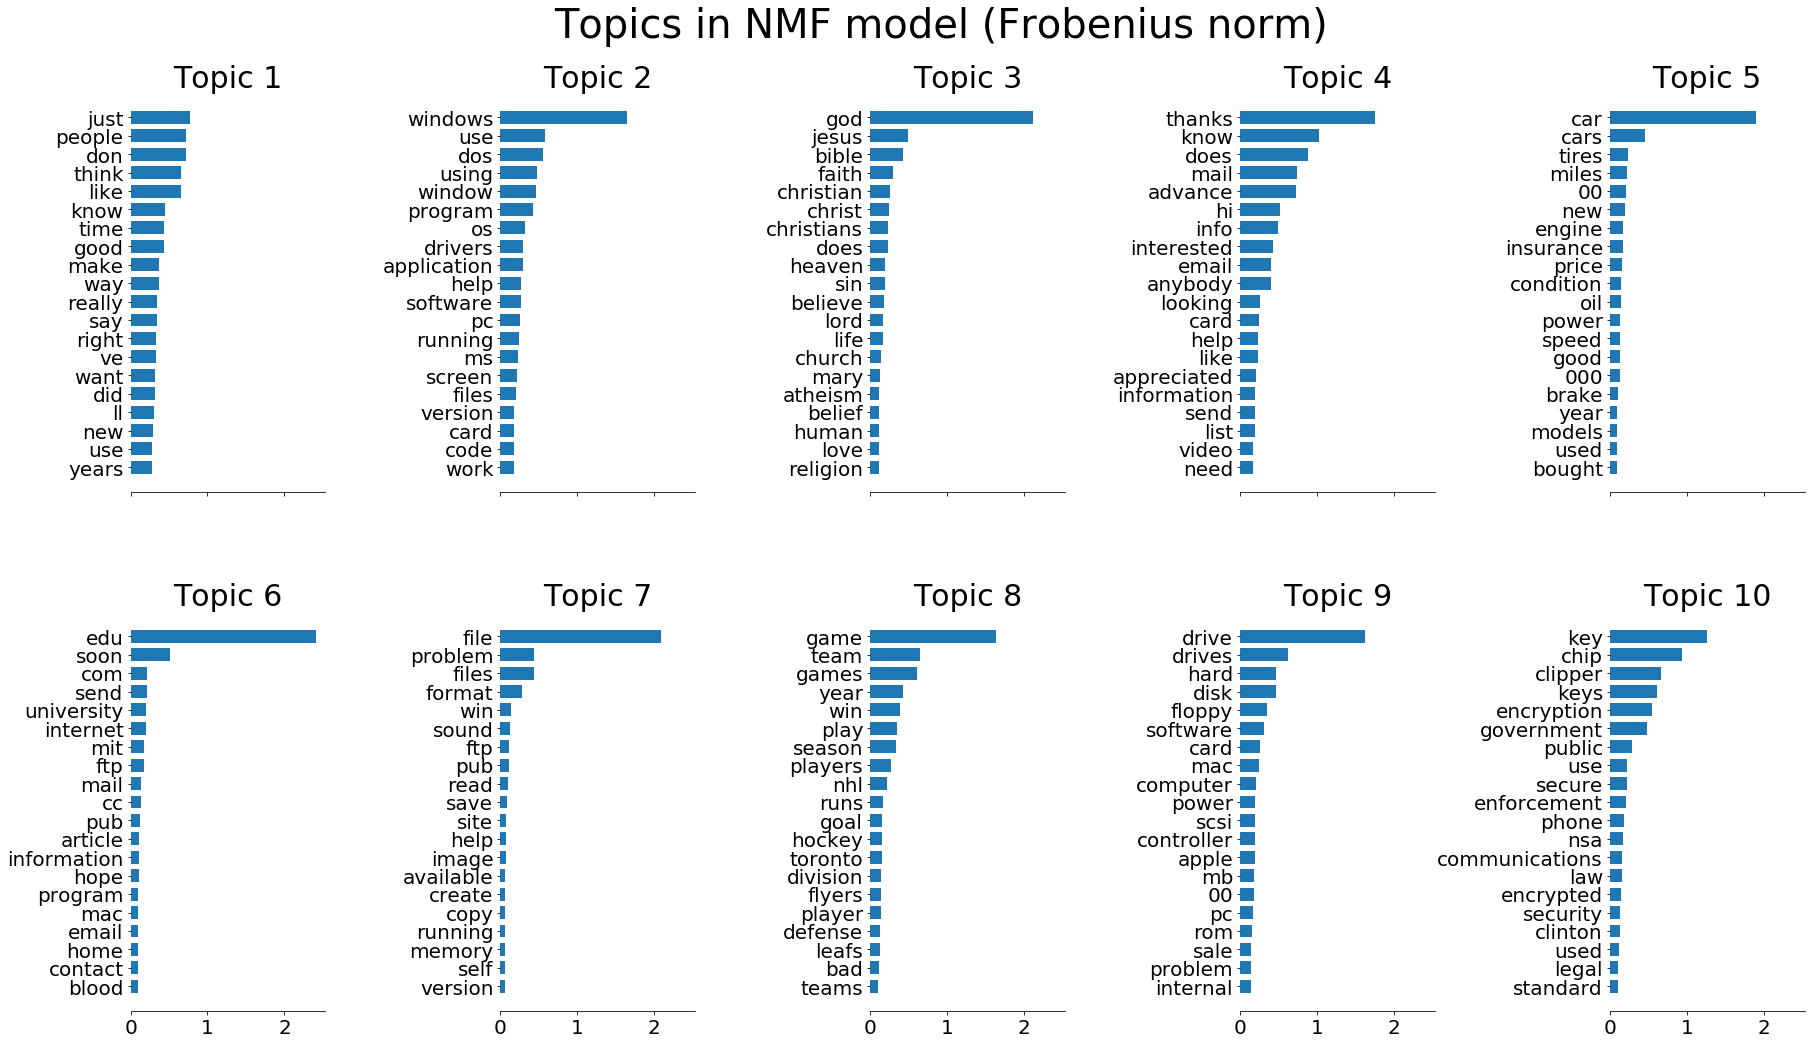



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 1.059s.
------ topic ----------
[0.00000000e+00 2.82862017e-02 1.75342287e-02 9.32725706e-03
 1.59479960e-02 5.35936868e-03 0.00000000e+00 1.74320930e-06
 0.00000000e+00 1.17799909e-02 3.55045874e-03 2.83994409e-04
 1.26766859e-02 9.48896896e-03 0.00000000e+00 0.00000000e+00
 3.41415384e-05 1.00972281e-02 1.96545848e-13 1.19414035e-09
 9.63188448e-03 1.99279872e-04 4.58584071e-04 7.59279434e-04
 2.95872043e-03 1.62726457e-03 0.00000000e+00 6.20336796e-04
 3.42549041e-03 0.00000000e+00 1.20398504e-02 2.38907342e-03
 0.00000000e+00 0.00000000e+00 1.14502531e-09 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.09039710e-12 0.00000000e+00
 0.00000000e+00 1.27754837e-03 0.00000000e+00 1.29495549e-10
 0.00000000e+00 7.26668772e-03 1.14006005e-10 0.00000000e+00
 3.32204152e-02 2.76626294e-08 5.73251777e-03 0.00000000e+00
 1.00192335e-02 0.00000000e+00 6.2558145

------ topic ----------
[4.44527639e-01 1.22737027e-01 5.74370798e-01 2.14493557e-01
 2.25974395e-01 3.04947209e-01 4.84355007e-02 1.76395180e-01
 5.86089860e-02 2.31906025e-01 3.02717046e-01 2.27575929e-01
 1.65099001e-01 1.38805702e-01 1.43804451e-01 1.28609031e-01
 8.06465897e-05 2.04769315e-01 1.69822591e-01 9.88738063e-02
 1.53735563e-01 1.39111916e-01 1.41767885e-01 2.09438543e-01
 1.07082530e-01 1.42297799e-01 1.13633146e-01 5.18112101e-02
 5.30043078e-02 2.26114196e-02 2.42338819e-01 1.15425480e-01
 8.75388671e-02 7.38989033e-02 6.32948709e-02 4.80574271e-02
 8.93879240e-02 3.35631575e-02 4.18614077e-02 6.99106016e-02
 0.00000000e+00 1.55160575e-01 2.41965950e-02 3.29002758e-02
 3.84812366e-02 5.57665610e-02 3.79015444e-02 8.90606893e-02
 1.92907249e-01 2.02694854e-01 2.40516051e-02 1.13117156e-01
 1.06562421e-01 6.00418181e-02 8.10749328e-02 5.63332193e-02
 8.02494712e-02 6.87737775e-02 6.52111910e-02 4.94003617e-02
 1.24040423e-01 1.15666599e-01 6.24811123e-02 1.79250593e-02


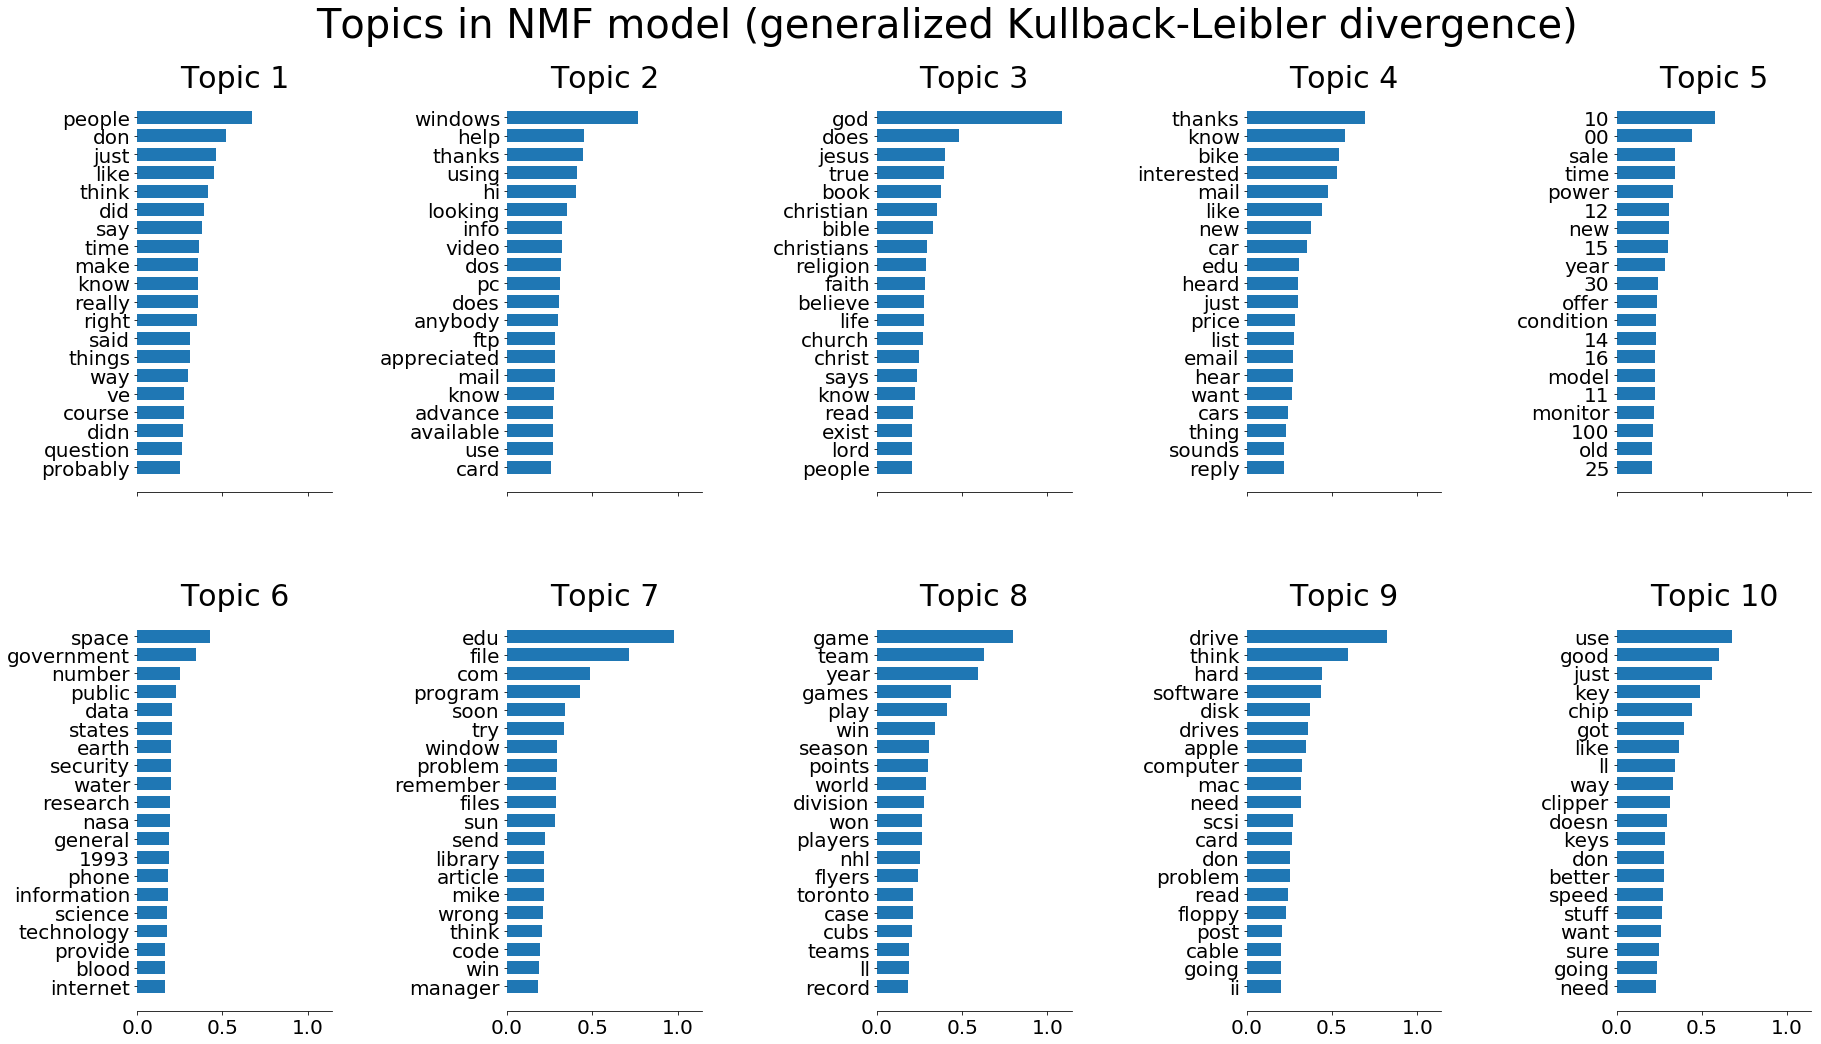



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 4.089s.
------ topic ----------
[4.96604155e+00 4.35373970e+00 2.14253989e+01 9.34656164e+00
 1.15230533e+01 1.38861695e+01 4.02740666e+01 9.84737644e+00
 1.61318877e+01 1.19530171e+01 9.24725729e+00 9.36810397e+00
 5.10001764e+00 1.36483691e+01 3.95895035e+00 2.20351083e+00
 4.78848373e+01 2.11535831e+01 2.72931771e-01 1.45428769e+01
 5.55300010e+00 5.75956702e+00 1.23442504e+01 2.57049698e+00
 6.16460343e+00 4.31762237e+00 4.12938934e+00 7.65457442e-01
 3.72577593e+00 4.33562174e-01 5.92791121e+00 3.36509377e+00
 5.04403287e+00 2.12907830e+00 4.44416027e+00 1.44482564e+00
 3.01441175e+00 3.15958896e+00 1.88588346e-01 3.28519136e+00
 3.82877642e+01 2.79687305e+00 1.56690784e+00 3.12518011e+00
 8.01875868e-01 4.00337725e+00 3.47845026e+00 5.90786908e+00
 9.00886246e+00 1.95526998e+00 9.34356879e-01 2.63205198e-01
 4.41326525e+00 4.37331326e+00 1.36104572e+00 1.95775214e+00
 2.65166035e+00 4.32221330e+

  7.70207759  1.02679042  2.56259123  0.13662652]
------ topic.argsort() ----------
[ 47 739 724 232 196 660 376 558 947 314 379 123 177 615 951 361 386 187
 841 403 149 144 176 103 608 499 639 374 959 375 719 158 270 297 715 294
 395 315 247 612 851 258  59 720 734 104 554 309 772 487 220 202 685 576
 995 837  18 331 161 240 164 925 511 955 114 583 168 244 189 503 329 109
 230  55 962  35 525 787 974  50 488 448 804 797 823 129 310 517 588 830
 393 293  73 172 476 825 577 697 550 343 290 281 853 849 601 878 812 459
 619  98 428 208 870 958 167  29 613 332 610 421 245 229 765 716 578  31
 575 591 500 482 481 311 475 218 197 212 135 241  56 358 299 426 478 937
 298  42 221 354 434 882 380 914 115  83 387 174  77 225 461 661 266 237
 921 435 277 274 894 439 742 295 289 457 701  52 272  51 999 351  60 799
 108  38 100 592 206   1 542 143 628 569 766 454 942  53 805 909 879 398
 178 112 162  72 236 780 893 749 326  62  82 195 626 498 427 971 723 264
  24 917 883 677 794 339 502 775  37 389

 8.36744403e+01 2.33777948e+01 3.06315114e+00 1.52307663e-01]
------ topic.argsort() ----------
[421 812 114 145 925 799 200 520 372 131 655 921 202 121 303 964  91 613
 144 256 849 851  96 439  69 363 575 686 481 149 841 837 353 922 965 137
 701 551 864  81 488 569 605 577 320 113  44 448 664 195 818 484 375 717
  35 289 597 483 995 240 576 877 141 620 209 709 434 728  14 248 689 247
 197  63 487  37  20 878 681 977 583 340 947 458 700 199 775 759 830 603
 763 558 820  46 293 502 797 951  90 934 136 297 122 492 123 898 498 666
 511 460  94 542 519 395 405 377 311 418 795 201 585 380 600 232 349 804
 112 386 614 616 459 615 198 254 512  87 588 959 612 796 698 231 351 472
 278 918 230 457 778 446 360 724 260 115 426  32 264 618 219 545 321 781
 493 931 901 617 509 305 285 702 555 165 723 317 628 505 298 412 823 328
 221 207 524 224 475 126 888  33 495 355 954 760 453 523 535 862 222 379
 467 241 936 832  54 715 356 999 893 106 552 431 491 374 170 455 347  77
 163  12 972 985 208 266 630

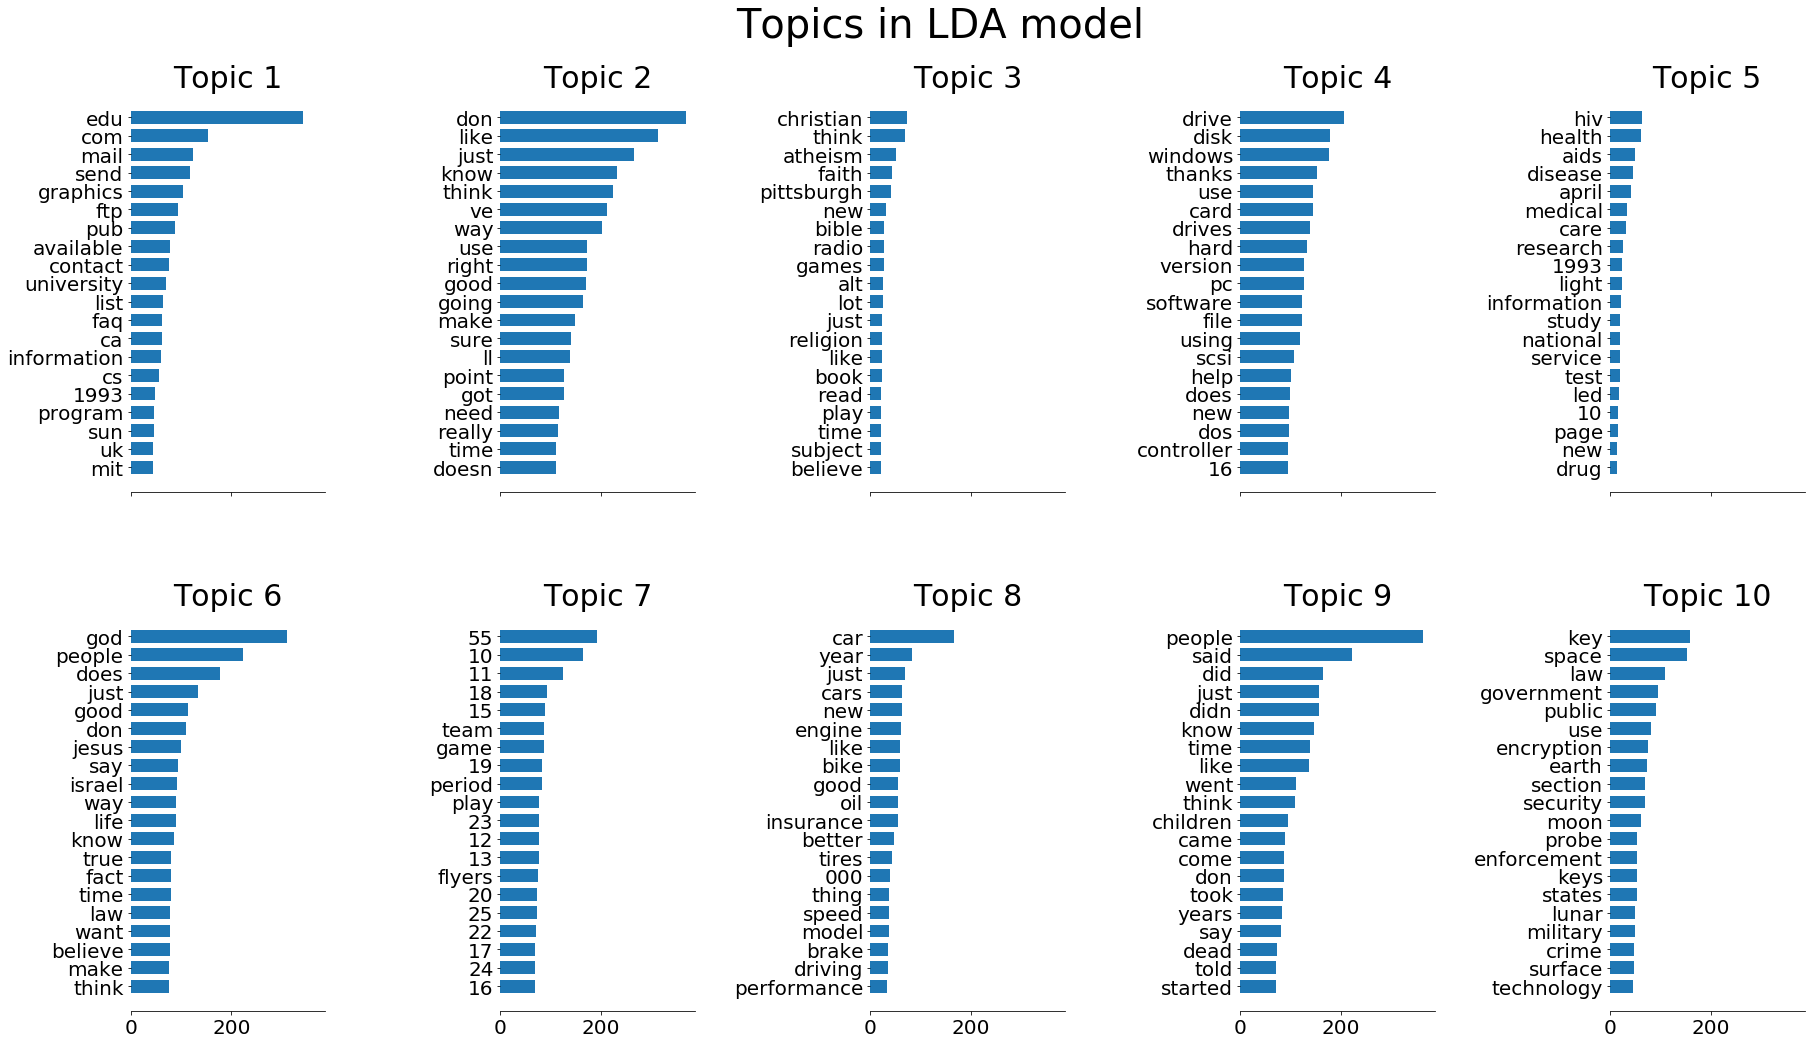

In [8]:
"""
=======================================================================================
Topic extraction with Non-negative Matrix Factorization and Latent Dirichlet Allocation
=======================================================================================

This is an example of applying :class:`~sklearn.decomposition.NMF` and
:class:`~sklearn.decomposition.LatentDirichletAllocation` on a corpus
of documents and extract additive models of the topic structure of the
corpus.  The output is a plot of topics, each represented as bar plot
using top few words based on weights.

Non-negative Matrix Factorization is applied with two different objective
functions: the Frobenius norm, and the generalized Kullback-Leibler divergence.
The latter is equivalent to Probabilistic Latent Semantic Indexing.

The default parameters (n_samples / n_features / n_components) should make
the example runnable in a couple of tens of seconds. You can try to
increase the dimensions of the problem, but be aware that the time
complexity is polynomial in NMF. In LDA, the time complexity is
proportional to (n_samples * iterations).

"""

# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        print("------ topic ----------")
        print(topic)
        
        print("------ topic.argsort() ----------")
        # get sorted index array from small to  large
        print(topic.argsort())
        
        # get n_top_words words from tail
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        
        print("----- top_features_ind ---------")
        print(top_features_ind)
        
        top_features = [feature_names[i] for i in top_features_ind]
        
        print("-------- top features -----------")
        print(top_features)
        
        weights = topic[top_features_ind]
        
        print("----------- weights -------------")
        print(weights)

        
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
t0 = time()
data, _ = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'),
                             return_X_y=True)
data_samples = data[:n_samples]
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (Frobenius norm)')

# Fit the NMF model
print('\n' * 2, "Fitting the NMF model (generalized Kullback-Leibler "
      "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (generalized Kullback-Leibler divergence)')

print('\n' * 2, "Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')
